In [1]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Data Import

In [2]:
df = pd.read_excel(r"C:\Users\Suresh\Downloads\AirPollution.xls")
df

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer
...,...,...,...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09,Bhosari,2004-09-01,Monsoon
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14,Bhosari,2004-09-08,Monsoon
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64,Bhosari,2004-09-15,Monsoon
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95,Bhosari,2004-09-22,Monsoon


In [3]:
df.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer


In [4]:
df=df.drop(['Site','Date','Season','Zn','Cd'],axis=1)

### Univariate Analysis

In [5]:
df.describe()

,PM10,Pb,Cu,Cr,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,68.536026,0.716358,0.331854,0.390066,42.692914,22.359868
std,40.908548,0.673069,0.408259,0.434575,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,8.260000,0.000000
25%,37.005000,0.220000,0.040000,0.085000,25.735000,15.165000
50%,59.610000,0.570000,0.130000,0.230000,37.000000,20.930000
75%,89.820000,0.965000,0.535000,0.580000,54.695000,27.420000
max,194.740000,3.490000,1.650000,3.220000,121.460000,53.270000


###  Data Type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    151 non-null    float64
 1   Pb      151 non-null    float64
 2   Cu      151 non-null    float64
 3   Cr      151 non-null    float64
 4   NOx     151 non-null    float64
 5   SO2     151 non-null    float64
dtypes: float64(6)
memory usage: 7.2 KB


### EDA

<AxesSubplot:>

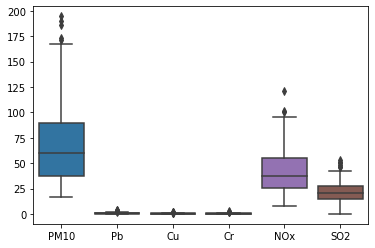

In [7]:
sns.boxplot(data=df)

### Winsorizing Technique -- Treatment of Outlier

In [8]:
q1 = df['PM10'].quantile(0.25)
q3 = df['PM10'].quantile(0.75)
iqr = q3-q1
upper_limit = q3+1.5*iqr
upper_limit

169.0425

In [9]:
df['PM10']= np.where(df['PM10'] > upper_limit,upper_limit,df['PM10'])

<AxesSubplot:>

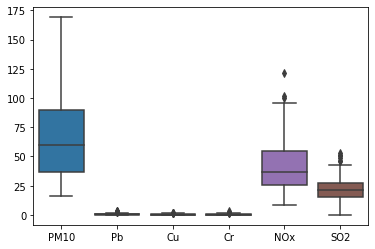

In [10]:
sns.boxplot(data=df)

In [11]:
q1 = df['NOx'].quantile(0.25)
q3 = df['NOx'].quantile(0.75)
iqr = q3-q1
upper_limit = q3+1.5*iqr
upper_limit

98.13499999999999

In [12]:
df['NOx']= np.where(df['NOx'] > upper_limit,upper_limit,df['NOx'])

<AxesSubplot:>

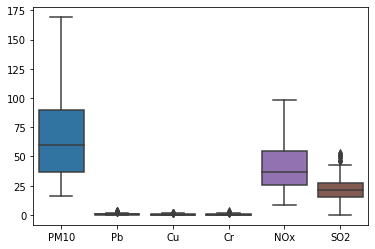

In [13]:
sns.boxplot(data=df)

In [14]:
q1 = df['Cr'].quantile(0.25)
q3 = df['Cr'].quantile(0.75)
iqr = q3-q1
upper_limit = q3+1.5*iqr
upper_limit

1.3224999999999998

In [15]:
df['Cr']= np.where(df['Cr'] > upper_limit,upper_limit,df['Cr'])

<AxesSubplot:>

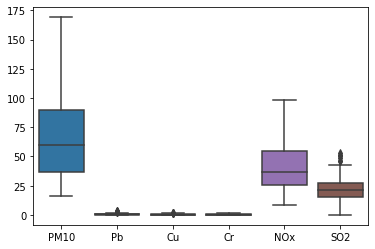

In [16]:
sns.boxplot(data=df)

In [17]:
q1 = df['Pb'].quantile(0.25)
q3 = df['Pb'].quantile(0.75)
iqr = q3-q1
upper_limit = q3+1.5*iqr
upper_limit

2.0825

In [18]:
df['Pb']= np.where(df['Pb'] > upper_limit,upper_limit,df['Pb'])

<AxesSubplot:>

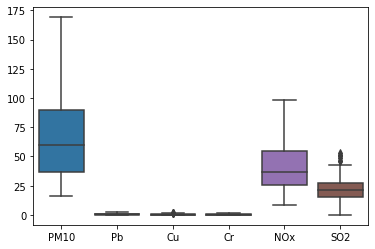

In [19]:
sns.boxplot(data=df)

In [20]:
q1 = df['Cu'].quantile(0.25)
q3 = df['Cu'].quantile(0.75)
iqr = q3-q1
upper_limit = q3+1.5*iqr
upper_limit

1.2775

In [21]:
df['Cu']= np.where(df['Cu'] > upper_limit,upper_limit,df['Cu'])

<AxesSubplot:>

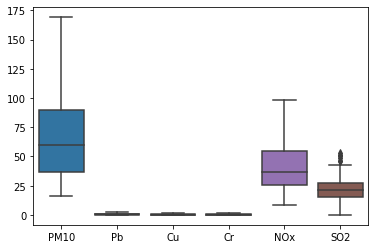

In [22]:
sns.boxplot(data=df)

In [23]:
q1 = df['SO2'].quantile(0.25)
q3 = df['SO2'].quantile(0.75)
iqr = q3-q1
upper_limit = q3+1.5*iqr
upper_limit

45.80250000000001

In [24]:
df['SO2']= np.where(df['SO2'] > upper_limit,upper_limit,df['SO2'])

<AxesSubplot:>

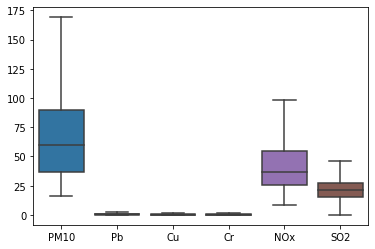

In [25]:
sns.boxplot(data=df)

### Missing values

In [26]:
df.isna().sum()

PM10    0
Pb      0
Cu      0
Cr      0
NOx     0
SO2     0
dtype: int64

### : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [27]:
# Putting feature variable to X
X = df.drop('PM10', axis= 1)

# Putting response variable to y
y = df[['PM10']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=123)

### Correlation Matrix

In [28]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,PM10,Pb,Cu,Cr,NOx,SO2
117,29.97,0.08,0.01,0.02,24.08,16.65
46,56.78,0.40,0.19,0.44,38.92,25.27
146,40.13,0.10,0.04,0.09,18.88,10.09
112,50.11,0.21,0.00,0.00,54.71,29.04
135,50.14,0.44,0.00,0.10,10.24,22.67


# df.corr()

<AxesSubplot:>

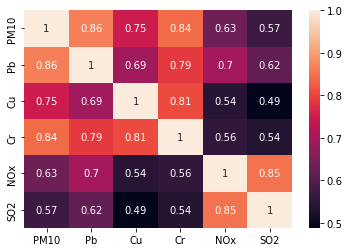

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
X1=df.drop(['PM10',],axis=1 
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Pb      8.803705
Cu      4.952885
Cr      8.320764
NOx    20.311086
SO2    17.024029
dtype: float64

Multicolinearity (with the help of VIF)

In [31]:
X1=df.drop(['PM10','NOx'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Pb     7.690493
Cu     4.863673
Cr     8.106525
SO2    4.009061
dtype: float64

### Model Building¶
H0 :- There is no Linear relationship between PM10 and Pb , Cu & SO2

Vs

H1 :- There is Linear relationship between PM10 and Pb , Cu & SO2

Alpha = 0.05 (5%)



In [32]:
import statsmodels.formula.api as smf
model2 = smf.ols('PM10 ~ Pb + Cu + Cr + SO2',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     111.8
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           5.19e-36
Time:                        13:15:18   Log-Likelihood:                -444.35
No. Observations:                 105   AIC:                             898.7
Df Residuals:                     100   BIC:                             912.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0939      3.950      6.100      0.000      16.258      31.930
Pb            34.4908      5.185      6.652      0.000      24.204      44.777
Cu            10.2375      7.045      1.453      0.149      -3.739      24.215
Cr            37.7779      9.330      4.049      0.000      19.267      56.289
SO2            0.0674      0.206      0.327      0.745      -0.342       0.476
==============================================================================
Omnibus:                       11.888   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.494
Skew:                           0.620   Prob(JB):                     0.000712
Kurtosis:                       4.333   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
import statsmodels.formula.api as smf
model2 = smf.ols('PM10 ~ Pb + Cr + SO2',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.11e-36
Time:                        13:15:18   Log-Likelihood:                -445.44
No. Observations:                 105   AIC:                             898.9
Df Residuals:                     101   BIC:                             909.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6156      3.957      5.967      0.000      15.765      31.466
Pb            35.4394      5.172      6.853      0.000      25.180      45.699
Cr            45.6740      7.627      5.989      0.000      30.545      60.803
SO2            0.0840      0.207      0.406      0.686      -0.327       0.495
==============================================================================
Omnibus:                       17.795   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.979
Skew:                           0.711   Prob(JB):                     1.88e-07
Kurtosis:                       5.249   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
import statsmodels.formula.api as smf
model2 = smf.ols('PM10 ~ Pb + Cr',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     221.8
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           7.15e-38
Time:                        13:15:18   Log-Likelihood:                -445.53
No. Observations:                 105   AIC:                             897.1
Df Residuals:                     102   BIC:                             905.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8155      2.617      9.482      0.000      19.624      30.006
Pb            36.2273      4.773      7.590      0.000      26.760      45.695
Cr            45.9909      7.555      6.087      0.000      31.005      60.977
==============================================================================
Omnibus:                       16.878   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.141
Skew:                           0.661   Prob(JB):                     2.85e-07
Kurtosis:                       5.267   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
There is Linear relationship between PM10 and Pb , Cu & SO2

81% is accuracy of model , so we say model is good fit

### Multicolinearity (with the help of VIF)

In [35]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,PM10,Pb,Cu,Cr,NOx,SO2,fitted_value,residual
117,29.97,0.08,0.01,0.02,24.08,16.65,28.633484,1.336516
46,56.78,0.40,0.19,0.44,38.92,25.27,59.542403,-2.762403
146,40.13,0.10,0.04,0.09,18.88,10.09,32.577394,7.552606
112,50.11,0.21,0.00,0.00,54.71,29.04,32.423210,17.686790
135,50.14,0.44,0.00,0.10,10.24,22.67,45.354576,4.785424


### Assumption of Model
Linearity
Normality
Homoscedasicity
Model Error has to be independently identificaly Distibuted

### Linearity

<AxesSubplot:xlabel='Pb', ylabel='PM10'>

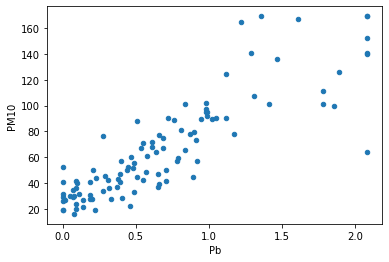

In [36]:
df.plot.scatter(x='Pb',y="PM10")

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

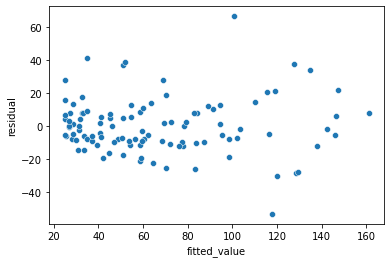

In [37]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

TV have 81% strong positve correlation with Sales
TV have high impact on Sales
There is no colinearity in data, So every platform is independent

###  Normality

#### import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<AxesSubplot:>

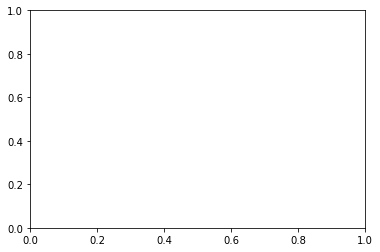

In [39]:
sns.histplot(df='residual')

# Model Error are IID 


<AxesSubplot:ylabel='Frequency'>

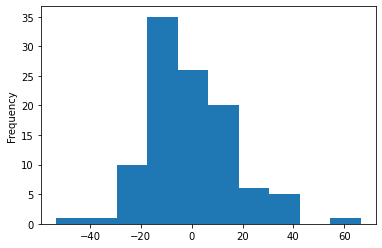

In [40]:
df['residual'].plot.hist()

In [41]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10
41,0.61,0.54,0.69,17.07,13.16,74.60
91,0.55,0.06,0.42,17.52,11.75,65.20
128,0.19,0.11,0.19,26.39,18.44,31.21
24,0.77,0.54,0.48,49.40,20.82,65.12
74,0.72,0.19,0.32,61.72,23.51,55.74


In [42]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10,Prediction
41,0.61,0.54,0.69,17.07,13.16,74.60,78.647863
91,0.55,0.06,0.42,17.52,11.75,65.20,64.056674
128,0.19,0.11,0.19,26.39,18.44,31.21,40.436942
24,0.77,0.54,0.48,49.40,20.82,65.12,74.786130
74,0.72,0.19,0.32,61.72,23.51,55.74,65.616217


In [46]:
df_test['Error']=df_test.PM10-df_test.Prediction
df_test['Square_Error']=(df_test.Error)*(df_test.Error)
df_test

,Pb,Cu,Cr,NOx,SO2,PM10,Prediction,Error,Square_Error
41,0.6100,0.5400,0.6900,17.070,13.1600,74.6000,78.647863,-4.047863,16.385194
91,0.5500,0.0600,0.4200,17.520,11.7500,65.2000,64.056674,1.143326,1.307193
128,0.1900,0.1100,0.1900,26.390,18.4400,31.2100,40.436942,-9.226942,85.136463
24,0.7700,0.5400,0.4800,49.400,20.8200,65.1200,74.786130,-9.666130,93.434067
74,0.7200,0.1900,0.3200,61.720,23.5100,55.7400,65.616217,-9.876217,97.539660
133,0.3400,0.2100,0.2200,19.370,10.0700,36.9300,47.250761,-10.320761,106.518103
131,0.1100,0.2200,0.1900,21.460,17.7200,35.8800,37.538761,-1.658761,2.751487
139,0.0000,0.0000,0.0000,37.000,22.4300,34.1200,24.815483,9.304517,86.574029
143,0.0000,0.0000,0.0000,30.520,24.5100,37.0800,24.815483,12.264517,150.418368
42,0.5900,0.4200,0.6000,41.620,26.7100,67.9600,73.784133,-5.824133,33.920530


In [47]:
np.mean(df_test.Square_Error)


282.7139788741386

In [50]:
import math
rsme = math.sqrt(282.7139)
rsme

16.81409825117006

In [52]:
from sklearn.metrics import mean_squared_error 
# calculate the mean squared error
model_mse = mean_squared_error(df['PM10'],df['fitted_value'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)

print("RMSE {:.3}".format(model_rmse))

RMSE 16.8


<AxesSubplot:ylabel='Count'>

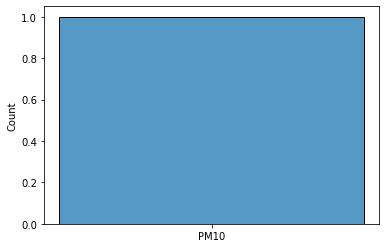

In [53]:
sns.histplot('PM10')

<AxesSubplot:ylabel='Frequency'>

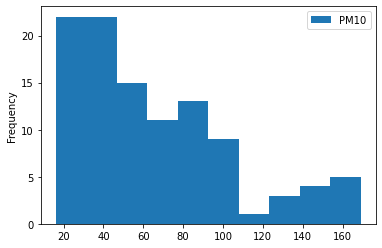

In [59]:
df.plot.hist(y='PM10')

### Test

In [43]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.PM10, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.83


### Train



In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(df.PM10,df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.81
